We have access to seemingly unlimited data on the web - unprecedented information about everyone and everything. The internet, if sentient, would be all-knowing. But could it make inferences greater than the sum of its parts? Will it remain a static record of humanity's doings or could it draw as yet unseen connections? Are insights limited to tailored ads and marketing opportunities or is there more we can learn...?



In [138]:
# Author: Philippa Hartley 
# Importing the basics first

import numpy as np
import os, sys, time
import scipy
from matplotlib import pyplot as plt

In [139]:
# Now import the web scraping library. This will do the heavylifting of getting the data 
# See https://www.crummy.com/software/BeautifulSoup/bs4/doc/#quick-start

from bs4 import BeautifulSoup
import requests

In [140]:
# We will make a function which will download html source code from a url and strip the content for us

def get_all_text(url):
    r  = requests.get(url)
    data = r.text
    soup = BeautifulSoup(data, 'html.parser')
    title = soup.title.string
    paras = []
    for txt in soup.find_all('p'):
        paras.append(txt.get_text())#
    paras = ' '.join(paras)
    return paras, title

# Now we will call this function using n randomly selected wikipedia topics

url = "https://en.wikipedia.org/wiki/Special:Random"
training_corpus = []

# We will download 100 individual wikipedia topics 

n_documents = 100
for i in range(n_documents):
    paras, title = get_all_text(url)
    training_corpus.append(paras)
print(training_corpus)

['Colin McLarty is an American logician whose publications have ranged widely in philosophy and the foundations of mathematics, as well as in the history of science and of mathematics.   McLarty\'s Elementary Categories and Elementary Toposes describes category theory and topos theory at an elementary level.[1] He has written papers about Saunders Mac Lane, one of the founders of category theory. He is a member of the Grothendieck Circle, which provides on-line and open access to many writings about the mathematician Alexandre Grothendieck, whose category-theoretic genius revolutionized Banach-space theory and algebraic geometry and whose life has fascinated many biographers and mathematical scientists.[2] McLarty has also written about the German algebraist, Emmy Noether, who was a Jewish woman, and her involvement with German political history.[3] McLarty claims that can show a proof of "Fermat Last Theorem" in Peano\'s Arithmetic, in 2012. At Case Western Reserve University (CWRU), 

We now have a set of documents forming our data corpus. This will be our training data.

Machine learning algorithms require a set of 'samples' on which to train and test, with each sample consisting of a set of 'features'. We need data in the form of numerical feature vectors of fixed size, so we need to convert the text from raw sequences of symbols into this format. 

We will apply three steps to do this:

1. Tokenise strings of letters by giving each possible word a different numerical id
2. Count the number of occurences of tokens in a document
3. Normalise and weight the tokens, awarding dimishing importance to those tokens which appear in more documents

Having done this, we will then convert the corpus into an n x m matrix with n rows of documents and m columns each representing the occurence of each token. This type of vectorisation is called 'Bag of words'. It is fast, but it loses information about relative positions of words.

Let's see what we can do with it anyway. 

In [141]:
# Importing feature extraction libraries

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

The next function contains several important parameters which will determine our results downstream:

1. Stop_words applies a pre-defined list of english words which will not be included in the final vectors
2. This can be done manually using df_max which limits words which occur with a document frequency higher than a set value
3. max_features builds a vocabulary that only considers the top max_features ordered by term frequency across the corpus


In [142]:
# Assigning token ids and counting occurences of each token in a document
# The counting function stores vectors in a sparse array to save memory

vectoriser = CountVectorizer(stop_words = 'english',max_df = 0.5, max_features = 1000)
X_train = vectoriser.fit_transform(training_corpus)
n_words = vectoriser.get_feature_names()
print('Number of unique tokens: ', len(n_words))
print('Counted tokens in each document:')
print(X_train)


Number of unique tokens:  1000
Counted tokens in each document:
  (0, 277)	1
  (0, 709)	1
  (0, 940)	1
  (0, 970)	1
  (0, 182)	1
  (0, 689)	1
  (0, 480)	1
  (0, 390)	2
  (0, 524)	1
  (0, 852)	1
  (0, 82)	1
  (0, 648)	1
  (0, 528)	1
  (0, 726)	1
  (0, 575)	1
  (0, 986)	2
  (0, 521)	1
  (0, 904)	4
  (0, 806)	1
  (0, 423)	2
  (0, 102)	1
  (0, 572)	5
  (1, 551)	1
  (1, 774)	1
  (1, 996)	1
  :	:
  (99, 81)	2
  (99, 271)	1
  (99, 540)	1
  (99, 356)	1
  (99, 939)	6
  (99, 252)	1
  (99, 425)	1
  (99, 985)	1
  (99, 1)	1
  (99, 846)	4
  (99, 526)	1
  (99, 607)	6
  (99, 78)	1
  (99, 952)	7
  (99, 496)	2
  (99, 45)	2
  (99, 3)	2
  (99, 123)	1
  (99, 736)	2
  (99, 906)	6
  (99, 390)	1
  (99, 986)	2
  (99, 806)	1
  (99, 423)	2
  (99, 102)	2


In [143]:


# Normalise, then weight each token by term-frequency times inverse document-frequency 
# to down-weight words which are common to many documents

transformer = TfidfTransformer()
X_train = transformer.fit_transform(X_train)

print('Weighted counted tokens in each document:')
print(X_train)

Weighted counted tokens in each document:
  (0, 572)	0.700529038151
  (0, 102)	0.0760219465231
  (0, 423)	0.188585113796
  (0, 806)	0.100644421351
  (0, 904)	0.481500457963
  (0, 521)	0.094292556898
  (0, 986)	0.183159034131
  (0, 575)	0.0891027057513
  (0, 726)	0.104445442269
  (0, 528)	0.097291683291
  (0, 648)	0.108833398891
  (0, 82)	0.104445442269
  (0, 852)	0.094292556898
  (0, 524)	0.094292556898
  (0, 390)	0.201288842702
  (0, 480)	0.120375114491
  (0, 689)	0.0868242602098
  (0, 182)	0.108833398891
  (0, 970)	0.104445442269
  (0, 940)	0.0868242602098
  (0, 709)	0.104445442269
  (0, 277)	0.104445442269
  (1, 575)	0.0370411914055
  (1, 906)	0.0258103056006
  (1, 219)	0.0500415516983
  :	:
  (99, 150)	0.0496202262536
  (99, 344)	0.0210025124108
  (99, 198)	0.124050565634
  (99, 479)	0.0232298160474
  (99, 917)	0.0582666459943
  (99, 785)	0.248101131268
  (99, 266)	0.232298160474
  (99, 847)	0.0181964416868
  (99, 413)	0.0220040424028
  (99, 954)	0.0201557308681
  (99, 664)	0.02015

We now have our corpus in the form of a set of training samples each containing n features. We are ready to investigate relationships between the features. We will try a clustering algorithm to do this.

In [144]:
# Importing clustering functions

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

# Starting with n clusters

n_clust = 5
km = MiniBatchKMeans(n_clusters=n_clust, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=False)
print("Clustering sparse data with %s" % km)
km.fit(X_train)

# Extract information about each cluster so that we can find out what each one represents

centroids = km.cluster_centers_
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectoriser.get_feature_names()
print()
print("Top terms per cluster:")
print() 
for i in range(n_clust):
    print("Cluster %d:" % i)#, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])#, end='')
    print()



    



Clustering sparse data with MiniBatchKMeans(batch_size=1000, compute_labels=True, init='k-means++',
        init_size=1000, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=1, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=False)

Top terms per cluster:

Cluster 0:
 include
 people
 film
 used
 german
 greek
 war
 general
 air
 book

Cluster 1:
 england
 blues
 having
 born
 bishop
 hand
 team
 united
 newcastle
 built

Cluster 2:
 family
 sea
 small
 1973
 robustus
 colochirus
 elevation
 described
 km²
 end

Cluster 3:
 district
 population
 city
 20
 53
 census
 turhal
 region
 religious
 endeavour

Cluster 4:
 album
 league
 music
 football
 band
 songs
 song
 women
 new
 plays



We can plot the clusters to visualise them, but first we need to project the data onto a 2D plane. TruncatedSVD will perform latent semantic analysis (LSA) by transforming our data into 'semantic' space of low dimensionality. 

0.0318515486702 0.151444613128 black
0.966025816396 -0.152322606332 green
0.0575128400627 0.178540629488 red
0.168088024801 0.121972678985 yellow


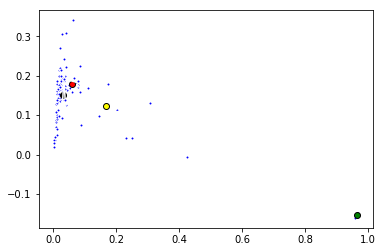

In [145]:
from sklearn.decomposition import TruncatedSVD

# Do the projection

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
reduced_data = svd.fit_transform(X)

# Cluster the projected data

kmeans = KMeans(init='k-means++', n_clusters=n_clust, n_init=10)
kmeans.fit(reduced_data)

# Find the locations of the cluster centres and the relative positions of each document

centroids = kmeans.cluster_centers_
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]    
mbk_means_labels = kmeans.labels_
mbk_means_cluster_centers = kmeans.cluster_centers_
mbk_means_labels_unique = np.unique(mbk_means_labels)

# Do the plotting

plt.figure(1)
colors = ['black', 'green', 'red', 'yellow']
for k, col in zip(range(n_clust), colors):
    
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    plt.plot(reduced_data[my_members, 0], reduced_data[my_members, 1], 'w',
            markerfacecolor='blue', marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
    print(cluster_center[0], cluster_center[1], col)
plt.show()


Now that we have some defined semantic clusters, we can download <b>new</b> wikipedia topics which we will us as our test data. We can then match each topic up with a cluster to see how it is defined by our algorithm.

In [146]:
#Download test topics

test_corpus = []
test_titles = []
n_documents = 100
for i in range(n_documents):
    paras, title = get_all_text(url)
    test_corpus.append(paras)
    test_titles.append(title)

print(test_titles)

['Procopius of Constantinople - Wikipedia', 'Outlands, Staffordshire - Wikipedia', 'Lophocampa pectina - Wikipedia', 'Arnold Zenker - Wikipedia', '1670 in Ireland - Wikipedia', 'Lewis Kemp House - Wikipedia', 'Tom Hopkins - Wikipedia', 'List of archives in Brazil - Wikipedia', 'Monterrey Institute of Technology and Higher Education, Chihuahua - Wikipedia', 'World Championship Motorsports - Wikipedia', 'Andy Thackeray - Wikipedia', 'International Campaign to Abolish Nuclear Weapons - Wikipedia', 'Casino Fandango - Wikipedia', 'Alice (1986 album) - Wikipedia', 'Punjab Regiment (India) - Wikipedia', 'Mariño Municipality, Nueva Esparta - Wikipedia', 'Rete 4 - Wikipedia', 'Paranaíta - Wikipedia', 'Nuuk Port and Harbour - Wikipedia', 'Ray Dalio - Wikipedia', 'Rhodiola rhodantha - Wikipedia', 'Reinhard Opitz - Wikipedia', 'Tissamaharama Tamil Brahmi inscription - Wikipedia', 'Signature (logic) - Wikipedia', '40th Infantry Division (United States) - Wikipedia', 'David Wood (basketball) - Wikip

In [147]:
# Do our vectorising on the test set using the model we have trained earlier

X_test = vectoriser.fit_transform(test_corpus)
n_words = vectoriser.get_feature_names()
print('Number of unique tokens: ', len(n_words))
print('Counted tokens in each document:')
print(X_test)

# Do our weighting on the test set

transformer = TfidfTransformer()
X_test = transformer.fit_transform(X_test)

print('Weighted counted tokens in each document:')
print(X_test)





Number of unique tokens:  1000
Counted tokens in each document:
  (0, 443)	1
  (0, 776)	1
  (0, 417)	1
  (0, 121)	1
  (0, 67)	1
  (0, 381)	1
  (0, 380)	2
  (0, 184)	1
  (0, 956)	1
  (0, 806)	1
  (0, 322)	1
  (0, 985)	1
  (0, 490)	1
  (0, 65)	1
  (0, 581)	1
  (0, 229)	3
  (0, 259)	1
  (0, 697)	1
  (0, 190)	1
  (0, 793)	2
  (0, 922)	1
  (0, 3)	1
  (0, 767)	1
  (0, 670)	2
  (0, 771)	1
  :	:
  (99, 751)	3
  (99, 194)	1
  (99, 986)	1
  (99, 609)	1
  (99, 458)	2
  (99, 619)	3
  (99, 869)	6
  (99, 75)	2
  (99, 506)	1
  (99, 510)	2
  (99, 835)	2
  (99, 706)	1
  (99, 122)	4
  (99, 445)	1
  (99, 248)	1
  (99, 645)	1
  (99, 287)	1
  (99, 111)	1
  (99, 908)	3
  (99, 167)	2
  (99, 431)	1
  (99, 38)	1
  (99, 271)	1
  (99, 319)	1
  (99, 4)	1
Weighted counted tokens in each document:
  (0, 713)	0.693860084104
  (0, 654)	0.0803045649246
  (0, 816)	0.0778290857058
  (0, 673)	0.166143830496
  (0, 174)	0.0528133643328
  (0, 4)	0.0615433696545
  (0, 994)	0.112601080225
  (0, 642)	0.075589742362
  (0, 376)	

In [148]:
# Find which cluster each topic belongs to

labels = km.predict(X_test)
print(labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0
 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]


Most new topics are being classed in the same cluster. Can you tweak the vectorisation process to make the results more sensible? When you are happy with this, do you agree with the groupings made by the machine? Can you make any interesting graphics to show relationships?

Are there any other websites whose text we might want to classify? News articles, film reviews.... We can use the tools explored here to develop techniques of more finesse over the coming sessions - this is just the beginning!